In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# df = pd.read_csv('data/RealEstateDataset.csv')

# Skip bad lines by using the 'on_bad_lines' parameter
# df = pd.read_csv('data/RealEstateDataset.csv', on_bad_lines='skip')


df = pd.read_csv('data/RealEstateDataset.csv', sep=';')  # Use the correct delimiter


In [7]:
df.head(5)

,name_nsi,price,index,environment,quality_of_living,safety,transport,services,relax,condition,...,last_reconstruction,total_floors,floor,lift,balkonies,loggia,cellar,type,rooms,district
0,Semerovo,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Original condition,...,NaN,NaN,NaN,0,NaN,NaN,0,3-room apartment,3,Nové Zámky
1,Semerovo,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Original condition,...,NaN,2.0,NaN,0,NaN,NaN,0,3-room apartment,3,Nové Zámky
2,Štúrovo,107000,"8,3",NaN,NaN,NaN,NaN,NaN,NaN,Partial reconstruction,...,NaN,5.0,3.0,0,NaN,NaN,0,1-room apartment,1,Nové Zámky
3,Štúrovo,105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete reconstruction,...,NaN,7.0,4.0,1,NaN,NaN,0,3-room apartment,3,Nové Zámky
4,Štúrovo,82000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partial reconstruction,...,2018.0,NaN,2.0,0,NaN,NaN,0,2-room apartment,2,Nové Zámky


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name_nsi             15403 non-null  object 
 1   price                15403 non-null  int64  
 2   index                5162 non-null   object 
 3   environment          4132 non-null   object 
 4   quality_of_living    4132 non-null   object 
 5   safety               4132 non-null   object 
 6   transport            4132 non-null   object 
 7   services             4132 non-null   object 
 8   relax                4132 non-null   object 
 9   condition            15076 non-null  object 
 10  area                 14687 non-null  object 
 11  energy_costs         980 non-null    float64
 12  provision            15403 non-null  int64  
 13  certificate          6445 non-null   object 
 14  construction_type    2367 non-null   object 
 15  orientation          1023 non-null  

#### Data Summary

In [29]:
# 1. Data Summary
print("Data Information:\n")
df.info()  # Summary of the dataset




Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name_nsi             15403 non-null  object 
 1   price                15403 non-null  int64  
 2   index                5162 non-null   object 
 3   environment          4132 non-null   object 
 4   quality_of_living    4132 non-null   object 
 5   safety               4132 non-null   object 
 6   transport            4132 non-null   object 
 7   services             4132 non-null   object 
 8   relax                4132 non-null   object 
 9   condition            15076 non-null  object 
 10  area                 14687 non-null  object 
 11  energy_costs         980 non-null    float64
 12  provision            15403 non-null  int64  
 13  certificate          6445 non-null   object 
 14  construction_type    2367 non-null   object 
 15  orientation      

In [30]:
df['area'].sample(20)

4508      68,7
9370        63
4526        64
11284       64
4686     75,67
15039      139
8644        68
12042       55
6954        47
1253        49
5331     52,09
10961       27
3060        30
2936     110,1
14526       40
8075        62
1335        90
9954        36
7947     59,27
777         55
Name: area, dtype: object

In [31]:
print("\nData Description:\n")
print(df.describe())  # Statistical description


Data Description:

              price  energy_costs     provision    year_built  \
count  1.540300e+04    980.000000  15403.000000   3878.000000   
mean   1.652057e+05    150.620408      0.156528   1901.702166   
std    1.629736e+05     52.324348      0.363367    499.062919   
min    1.150000e+04     20.000000      0.000000      1.000000   
25%    9.990000e+04    110.000000      0.000000   1971.000000   
50%    1.369000e+05    150.000000      0.000000   1980.000000   
75%    1.900000e+05    190.000000      0.000000   2020.000000   
max    9.936000e+06    365.000000      1.000000  19741.000000   

       last_reconstruction  total_floors        floor          lift  \
count           682.000000   7286.000000  8316.000000  15403.000000   
mean           2018.302053      5.610760     3.494108      0.271960   
std               6.011953      3.662984     2.627088      0.444984   
min            1968.000000      1.000000    -7.000000      0.000000   
25%            2016.000000      3.00000

In [32]:

print(df.describe(include='object'))  # Statistical description

                                 name_nsi index environment quality_of_living  \
count                               15403  5162        4132              4132   
unique                                598    58          58                54   
top     Bratislava - mestská časť Ružinov   8,1           8               9,4   
freq                                  979   295         292               463   

       safety transport services relax                condition   area  \
count    4132      4132     4132  4132                    15076  14687   
unique     69        74       80    76                        6   2746   
top        10       9,3      9,4   7,1  Complete reconstruction     70   
freq      842       734      212   182                     4389    319   

       certificate construction_type orientation              type  \
count         6445              2367        1023             15403   
unique           8                11           8                 7   
top          

### 2. Check for Missing Values

In [33]:
# 2. Check for Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())




Missing Values:

name_nsi                   0
price                      0
index                  10241
environment            11271
quality_of_living      11271
safety                 11271
transport              11271
services               11271
relax                  11271
condition                327
area                     716
energy_costs           14423
provision                  0
certificate             8958
construction_type      13036
orientation            14380
year_built             11525
last_reconstruction    14721
total_floors            8117
floor                   7087
lift                       0
balkonies              13636
loggia                 13883
cellar                     0
type                       0
rooms                      0
district                   0
dtype: int64


In [34]:
df.columns

Index(['name_nsi', 'price', 'index', 'environment', 'quality_of_living',
       'safety', 'transport', 'services', 'relax', 'condition', 'area',
       'energy_costs', 'provision', 'certificate', 'construction_type',
       'orientation', 'year_built', 'last_reconstruction', 'total_floors',
       'floor', 'lift', 'balkonies', 'loggia', 'cellar', 'type', 'rooms',
       'district'],
      dtype='object')

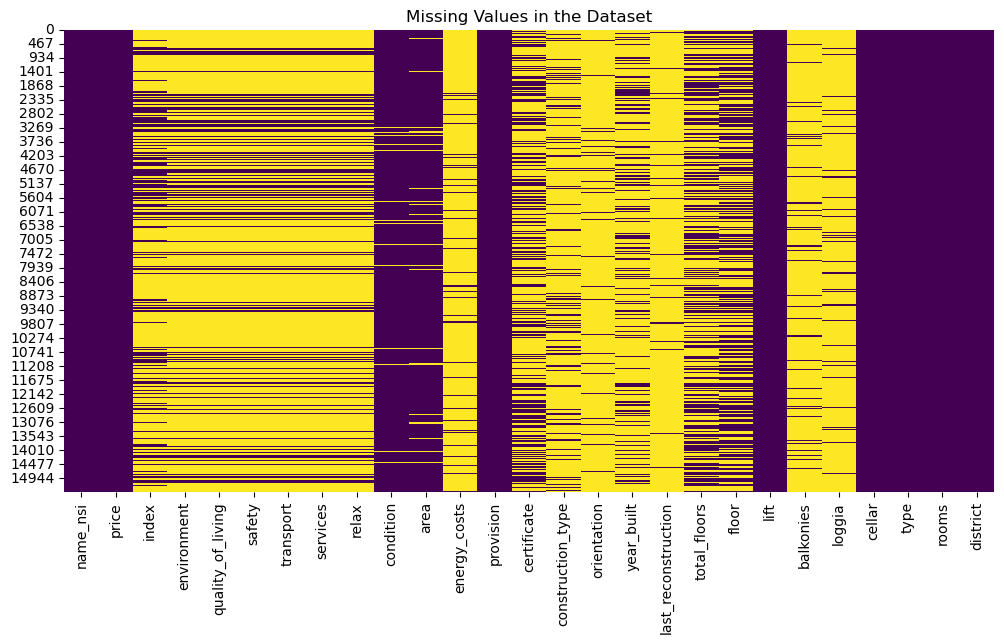

In [35]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()



## 3. Handling Missing Values

In [36]:
# 3. Handling Missing Values
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

# For other missing values, you can fill them with median/mode depending on the nature of the column
# For numerical columns, fill missing values with the median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill missing values with the mode
for col in df.select_dtypes(include=[object]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)



In [37]:
# 2. Check for Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())



Missing Values:

name_nsi     0
price        0
condition    0
area         0
provision    0
floor        0
lift         0
cellar       0
type         0
rooms        0
district     0
dtype: int64


In [38]:
df.columns


Index(['name_nsi', 'price', 'condition', 'area', 'provision', 'floor', 'lift',
       'cellar', 'type', 'rooms', 'district'],
      dtype='object')

In [39]:
df.head()

,name_nsi,price,condition,area,provision,floor,lift,cellar,type,rooms,district
0,Semerovo,42000,Original condition,58,0,3.0,0,0,3-room apartment,3,Nové Zámky
1,Semerovo,42000,Original condition,58,0,3.0,0,0,3-room apartment,3,Nové Zámky
2,Štúrovo,107000,Partial reconstruction,40,0,3.0,0,0,1-room apartment,1,Nové Zámky
3,Štúrovo,105000,Complete reconstruction,76,1,4.0,1,0,3-room apartment,3,Nové Zámky
4,Štúrovo,82000,Partial reconstruction,63,0,2.0,0,0,2-room apartment,2,Nové Zámky


In [41]:
df['condition'].describe()

count                       15403
unique                          6
top       Complete reconstruction
freq                         4716
Name: condition, dtype: object

In [60]:
df['condition'].sample(10)

13871    Complete reconstruction
3437          Original condition
2644     Complete reconstruction
6775      Partial reconstruction
5793          Under construction
8500                New building
14677         Original condition
6476                New building
4869     Complete reconstruction
12877     Partial reconstruction
Name: condition, dtype: object

# 4. Feature Engineering

In [61]:
# 4. Feature Engineering
# Extract relevant features from the 'condition' column
df['condition'] = df['condition'].apply(lambda x: 1 if 'reconstruction' in str(x).lower() else 0)

print(df['condition'].head())

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['district', 'type'], drop_first=True)




0    0
1    0
2    1
3    1
4    1
Name: condition, dtype: int64


In [62]:
df.head()

,name_nsi,price,condition,area,provision,floor,lift,cellar,rooms,district_Banská Štiavnica,...,district_Šaľa,district_Žarnovica,district_Žiar nad Hronom,district_Žilina,type_2-room apartment,type_3-room apartment,type_4-room apartment,type_5 or more room apartment,type_Studio,type_Two-room apartment
0,Semerovo,42000,0,58,0,3.0,0,0,3,False,...,False,False,False,False,False,True,False,False,False,False
1,Semerovo,42000,0,58,0,3.0,0,0,3,False,...,False,False,False,False,False,True,False,False,False,False
2,Štúrovo,107000,1,40,0,3.0,0,0,1,False,...,False,False,False,False,False,False,False,False,False,False
3,Štúrovo,105000,1,76,1,4.0,1,0,3,False,...,False,False,False,False,False,True,False,False,False,False
4,Štúrovo,82000,1,63,0,2.0,0,0,2,False,...,False,False,False,False,True,False,False,False,False,False


In [12]:
df.columns

Index(['name_nsi', 'price', 'condition', 'area', 'provision', 'floor', 'lift',
       'cellar', 'type', 'rooms', 'district'],
      dtype='object')

# 5. Outlier Detection

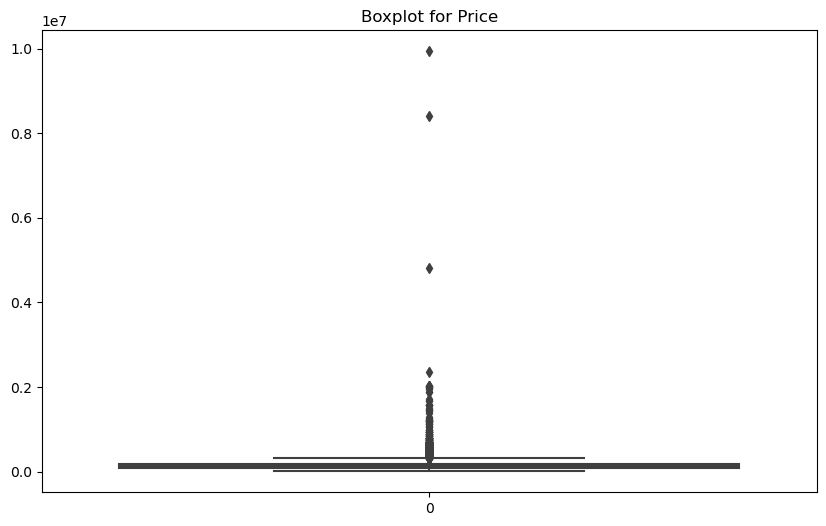

In [64]:
# 5. Outlier Detection
# Visualize outliers in the 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(df['price'])
plt.title('Boxplot for Price')
plt.show()

# Remove outliers using IQR method for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]



Numeric Columns for Correlation:
 Index(['price', 'condition', 'provision', 'floor', 'lift', 'cellar', 'rooms'], dtype='object')


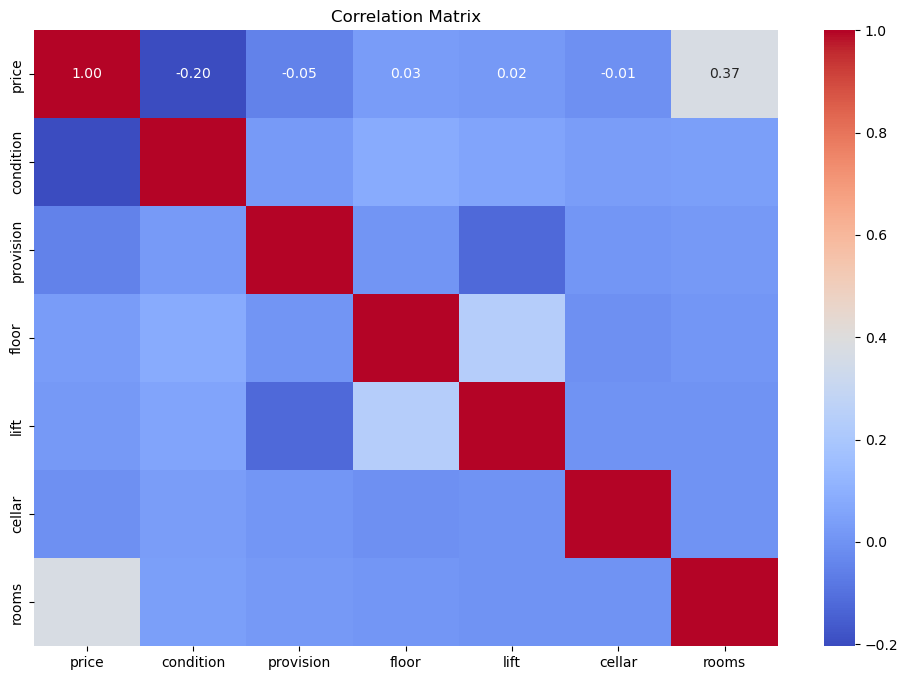

In [65]:
# 6. Correlation Analysis
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Check the numeric columns in the dataframe
print("Numeric Columns for Correlation:\n", numeric_df.columns)

# Create a correlation matrix using only the numeric columns
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



# 7. Feature Scaling

In [67]:
# 7. Feature Scaling
# Apply MinMax Scaling to numeric columns

# Convert comma-separated numeric values to float
df['area'] = df['area'].apply(lambda x: str(x).replace(',', '.')).astype(float)
df['floor'] = df['floor'].apply(lambda x: str(x).replace(',', '.')).astype(float)

# Apply the same transformation for any other columns that might have comma-separated values
df['price'] = df['price'].apply(lambda x: str(x).replace(',', '.')).astype(float)

# Now apply MinMax Scaling to numeric columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = ['price', 'area', 'floor']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



In [68]:
# 8. Splitting the Dataset for Modeling
# Define your target variable and features
X = df.drop(columns=['price'])
y = df['price']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Data Types Before Modeling:
 name_nsi                          object
condition                          int64
area                             float64
provision                          int64
floor                            float64
                                  ...   
type_3-room apartment               bool
type_4-room apartment               bool
type_5 or more room apartment       bool
type_Studio                         bool
type_Two-room apartment             bool
Length: 92, dtype: object
Mean Squared Error: 1.9447459503832125e+18
R-squared: -5.093656264396175e+19


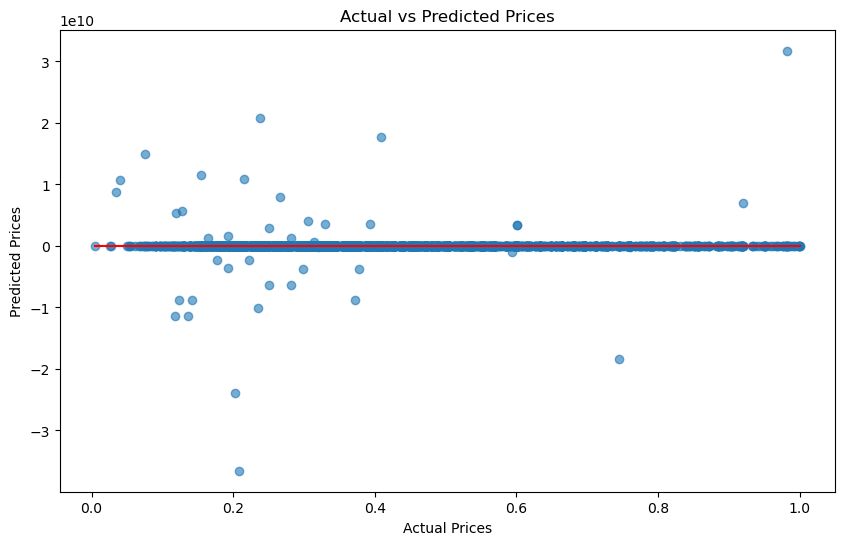

In [27]:
# 9. Model Building - Linear Regression as an example
# Check for any remaining non-numeric columns
print("Data Types Before Modeling:\n", X_train.dtypes)

# Ensure all categorical columns are one-hot encoded or converted to numeric
# This step ensures any remaining non-numeric columns are encoded correctly
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_train and X_test after encoding to ensure they have the same number of features
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Now, build the model with the cleaned data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

